<div id="instructions">
Complete all **Exercises**, and submit answers to **Questions** on the Coursera 
platform.
</div>

## Getting Started

### Load packages

In this lab we will explore the data using the `dplyr` package and visualize it 
using the `ggplot2` package for data visualization. The data can be found in the
companion package for this course, `statsr`.

Let's load the packages.


In [1]:
library(statsr)
library(dplyr)
library(shiny)
library(ggplot2)


Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix

************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### The data

We consider real estate data from the city of Ames, Iowa. The details of 
every real estate transaction in Ames is recorded by the City Assessor's 
office. Our particular focus for this lab will be all residential home sales 
in Ames between 2006 and 2010.  This collection represents our population of 
interest. In this lab we would like to learn about these home sales by taking 
smaller samples from the full population. Let's load the data.


In [2]:
data(ames)

In [3]:
names(ames)

[1] "Order"           "PID"             "area"            "price"          
 [5] "MS.SubClass"     "MS.Zoning"       "Lot.Frontage"    "Lot.Area"       
 [9] "Street"          "Alley"           "Lot.Shape"       "Land.Contour"   
[13] "Utilities"       "Lot.Config"      "Land.Slope"      "Neighborhood"   
[17] "Condition.1"     "Condition.2"     "Bldg.Type"       "House.Style"    
[21] "Overall.Qual"    "Overall.Cond"    "Year.Built"      "Year.Remod.Add" 
[25] "Roof.Style"      "Roof.Matl"       "Exterior.1st"    "Exterior.2nd"   
[29] "Mas.Vnr.Type"    "Mas.Vnr.Area"    "Exter.Qual"      "Exter.Cond"     
[33] "Foundation"      "Bsmt.Qual"       "Bsmt.Cond"       "Bsmt.Exposure"  
[37] "BsmtFin.Type.1"  "BsmtFin.SF.1"    "BsmtFin.Type.2"  "BsmtFin.SF.2"   
[41] "Bsmt.Unf.SF"     "Total.Bsmt.SF"   "Heating"         "Heating.QC"     
[45] "Central.Air"     "Electrical"      "X1st.Flr.SF"     "X2nd.Flr.SF"    
[49] "Low.Qual.Fin.SF" "Bsmt.Full.Bath"  "Bsmt.Half.Bath"  "Full.Bath"      
[53] "Half.Bath"       "Bedroom.AbvGr"   "Kitchen.AbvGr"   "Kitchen.Qual"   
[57] "TotRms.AbvGrd"   "Functional"      "Fireplaces"      "Fireplace.Qu"   
[61] "Garage.Type"     "Garage.Yr.Blt"   "Garage.Finish"   "Garage.Cars"    
[65] "Garage.Area"     "Garage.Qual"     "Garage.Cond"     "Paved.Drive"    
[69] "Wood.Deck.SF"    "Open.Porch.SF"   "Enclosed.Porch"  "X3Ssn.Porch"    
[73] "Screen.Porch"    "Pool.Area"       "Pool.QC"         "Fence"          
[77] "Misc.Feature"    "Misc.Val"        "Mo.Sold"         "Yr.Sold"        
[81] "Sale.Type"       "Sale.Condition"

We see that there are quite a few variables in the data set, enough to do a 
very in-depth analysis. For this lab, we'll restrict our attention to just 
two of the variables: the above ground living area of the house in square feet 
(`area`) and the sale price (`price`).

We can explore the distribution of areas of homes in the population of home
sales visually and with summary statistics. Let's first create a visualization,
a histogram:


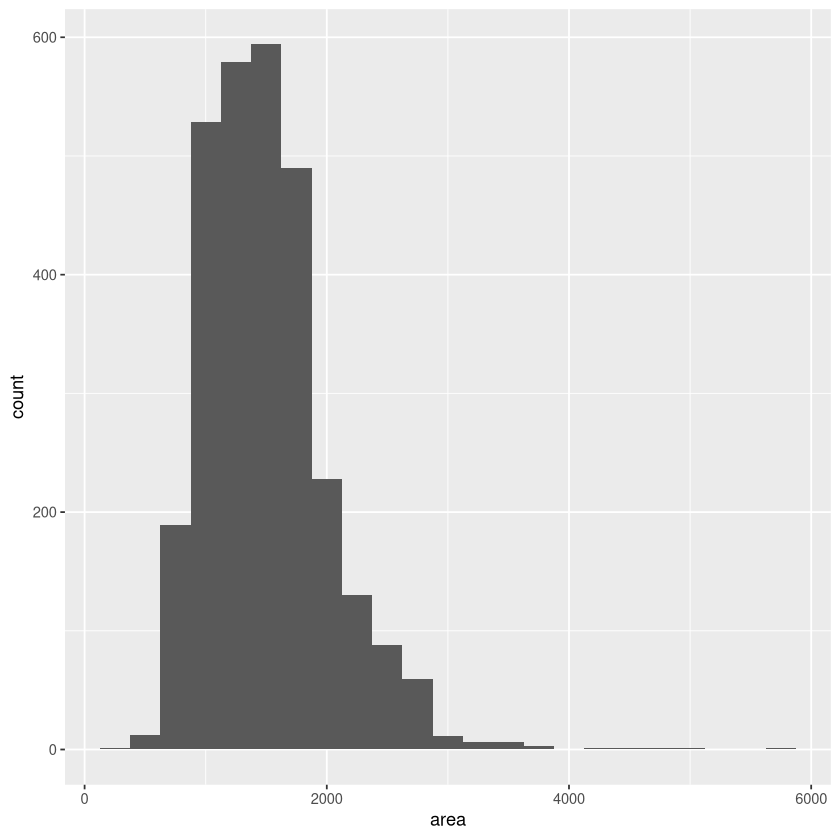

In [4]:
ggplot(data = ames, aes(x = area)) +
  geom_histogram(binwidth = 250)


Let's also obtain some summary statistics. Note that we can do this using the
`summarise` function. We can calculate as many statistics as we want using this
function, and just string along the results. Some of the functions below should
be self explanatory (like `mean`, `median`, `sd`, `IQR`, `min`, and `max`). A
new function here is the `quantile` function which we can use to calculate 
values corresponding to specific percentile cutoffs in the distribution. For
example `quantile(x, 0.25)` will yield the cutoff value for the 25th percentile (Q1)
in the distribution of x. Finding these values are useful for describing the 
distribution, as we can use them for descriptions like **"the middle 50% of the 
homes have areas between such and such square feet"**.


In [5]:
ames %>%
  summarise(mu = mean(area), pop_med = median(area), 
            sigma = sd(area), pop_iqr = IQR(area),
            pop_min = min(area), pop_max = max(area),
            pop_q1 = quantile(area, 0.25),  # first quartile, 25th percentile
            pop_q3 = quantile(area, 0.75))  # third quartile, 75th percentile


mu,pop_med,sigma,pop_iqr,pop_min,pop_max,pop_q1,pop_q3
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1499.69,1442,505.5089,616.75,334,5642,1126,1742.75


1.  Which of the following is **false**?
<ol>
<li> The distribution of areas of houses in Ames is unimodal and right-skewed. </li>
<li> 50% of houses in Ames are smaller than 1,499.69 square feet. </li>
<li> The middle 50% of the houses range between approximately 1,126 square feet and 1,742.7 square feet. </li>
<li> The IQR is approximately 616.7 square feet. </li>
<li> The smallest house is 334 square feet and the largest is 5,642 square feet. </li>
</ol>

**Answer**: B Is false, the median is 1442 



## The unknown sampling distribution

In this lab we have access to the entire population, but this is rarely the 
case in real life. Gathering information on an entire population is often 
extremely costly or impossible. Because of this, we often take a sample of 
the population and use that to understand the properties of the population.

If we were interested in estimating the mean living area in Ames based on a 
sample, we can use the following command to survey the population.

In [6]:
samp1 <- ames %>%
  sample_n(size = 50)

This command collects a simple random sample of `size` 50 from the `ames` dataset, 
which is assigned to `samp1`. This is like going into the City 
Assessor's database and pulling up the files on 50 random home sales. Working 
with these 50 files would be considerably simpler than working with all 2930 
home sales.

* * *
### Exercise
**Exercise**: Describe the distribution of this sample? How does it compare to the distribution of the population? **Hint:** `sample_n` function takes a random sample of observations (i.e. rows) from the dataset, you can still refer to the variables in the dataset with the same names. Code you used in the previous exercise will also be helpful for visualizing and summarizing the sample, however be careful to not label values `mu` and `sigma` anymore since these are sample statistics, not population parameters. You can customize the labels of any of the statistics to indicate that these come from the sample.
</div>


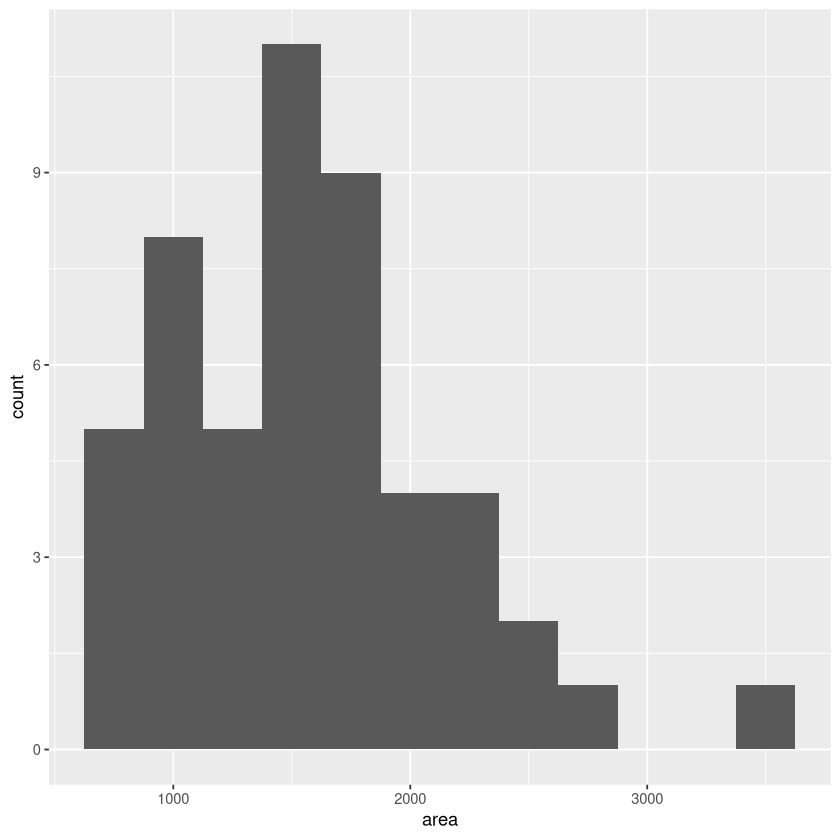

In [7]:
# type your code for the Exercise here, and Run Document

ggplot(data = samp1, aes(x = area)) +
  geom_histogram(binwidth = 250)

In [8]:
samp1 %>%
  summarise(x_bar = mean(area), samp_median = median(area), 
            s = sd(area), samp_iqr = IQR(area),
            samp_min = min(area), samp_max = max(area),
            samp_q1 = quantile(area, 0.25),  # first quartile, 25th percentile
            samp_q3 = quantile(area, 0.75))  # third quartile, 75th percentile

x_bar,samp_median,s,samp_iqr,samp_min,samp_max,samp_q1,samp_q3
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1582.24,1561.5,575.4122,728.5,790,3447,1104.5,1833


**Answer**: The distribution has some outliers at the right, as previously noticed from the population distribution. The population sample works as a good estimator, the summary statistics are not so different from the total population. It would be useful to make some test hypothesis to check if the differences are significantly different (checking a p-value for example).

------------
If we're interested in estimating the average living area in homes in Ames 
using the sample, our best single guess is the sample mean.


In [9]:
samp1 %>%
  summarise(x_bar = mean(area))


x_bar
<dbl>
1582.24


Depending on which 50 homes you selected, your estimate could be a bit above 
or a bit below the true population mean of 1,499.69 square feet. In general, 
though, the sample mean turns out to be a pretty good estimate of the average 
living area, and we were able to get it by sampling less than 3\% of the 
population.

2. Suppose we took two more samples, one of size 100 and one of size 1000. Which would you think would provide a more accurate estimate of the population mean?
<ol>
<li> Sample size of 50. </li>
<li> Sample size of 100. </li>
<li> Sample size of 1000. </li>
</ol>

**Answer**: The one with sample size of 1k
* * *

Let's take one more sample of size 50, and view the mean area in this sample:


In [10]:
ames %>%
  sample_n(size = 50) %>%
  summarise(x_bar = mean(area))


x_bar
<dbl>
1479.86


Not surprisingly, every time we take another random sample, we get a different 
sample mean. It's useful to get a sense of just how much variability we 
should expect when estimating the population mean this way. The distribution 
of sample means, called the *sampling distribution*, can help us understand 
this variability. In this lab, because we have access to the population, we 
can build up the sampling distribution for the sample mean by repeating the 
above steps many times. Here we will generate 15,000 samples and compute the 
sample mean of each. Note that we are sampling with replacement, 
`replace = TRUE` since sampling distributions are constructed with sampling
with replacement.


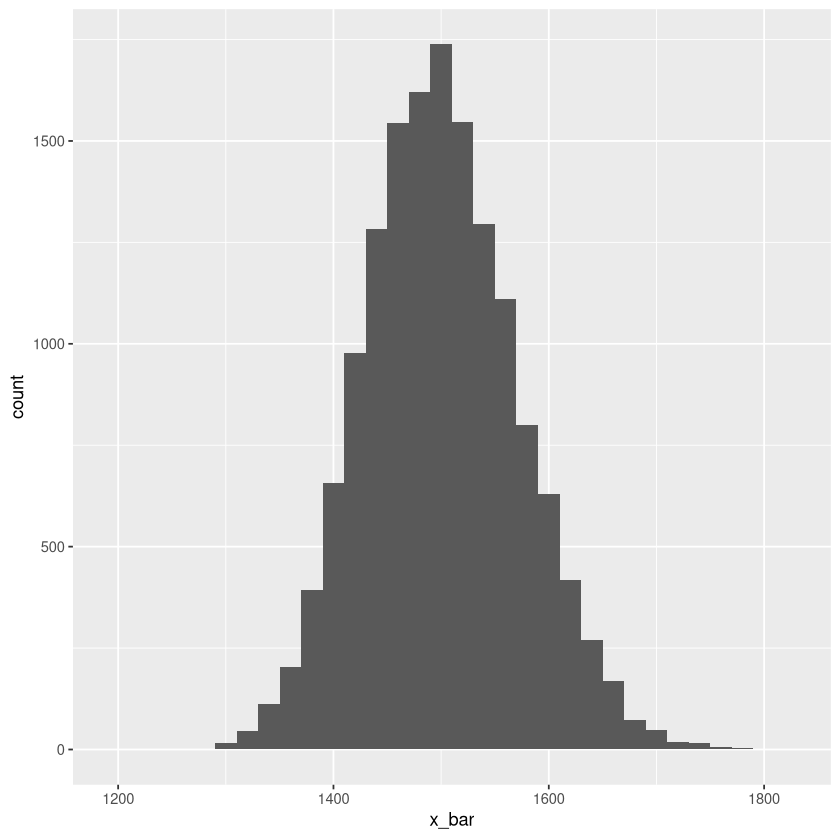

In [11]:
sample_means50 <- ames %>%
                    rep_sample_n(size = 50, reps = 15000, replace = TRUE) %>%
                    summarise(x_bar = mean(area))

ggplot(data = sample_means50, aes(x = x_bar)) +
  geom_histogram(binwidth = 20)


Here we use R to take 15,000 samples of size 50 from the population, calculate 
the mean of each sample, and store each result in a vector called 
`sample_means50`. Next, we review how this set of code works.

### Exercise
**Exercise**: How many elements are there in `sample_means50`?  Describe the sampling distribution, and be sure to specifically note its center. Make sure to include a plot of the distribution in your answer.
</div>


In [12]:
# type your code for the Exercise here, and Run Document
dim(sample_means50)

sample_means50 %>%
    summarise(xbar = mean(x_bar), samp_median = median(x_bar), 
            s = sd(x_bar), samp_iqr = IQR(x_bar),
            samp_min = min(x_bar), samp_max = max(x_bar),
            samp_q1 = quantile(x_bar, 0.25),  # first quartile, 25th percentile
            samp_q3 = quantile(x_bar, 0.75))  # third quartile, 75th percentile

[1] 15000     2

xbar,samp_median,s,samp_iqr,samp_min,samp_max,samp_q1,samp_q3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1500.26,1497.38,71.03498,96.2,1209.08,1815.12,1450.94,1547.14


## Interlude: Sampling distributions

The idea behind the `rep_sample_n` function is *repetition*. Earlier we took
a single sample of size `n` (50) from the population of all houses in Ames. With
this new function we are able to repeat this sampling procedure `rep` times in order
to build a distribution of a series of sample statistics, which is called the 
**sampling distribution**. 

Note that in practice one rarely gets to build sampling distributions, 
because we rarely have access to data from the entire population. 

Without the `rep_sample_n` function, this would be painful. We would have to 
manually run the following code 15,000 times 


In [13]:
ames %>%
  sample_n(size = 50) %>%
  summarise(x_bar = mean(area))


x_bar
<dbl>
1605.68


as well as store the resulting sample means each time in a separate vector.

Note that for each of the 15,000 times we computed a mean, we did so from a 
**different** sample!
* * *
### Exercise
**Exercise**: To make sure you understand how sampling distributions are built, and exactly what the `sample_n` and `do` function do, try modifying the code to create a sampling distribution of **25 sample means** from **samples of size 10**, and put them in a data frame named `sample_means_small`. Print the output. How many observations are there in this object called `sample_means_small`? What does each observation represent?
</div>


In [14]:
# type your code for the Exercise here, and Run Document
sample_means_small <- ames %>%
    rep_sample_n(size = 10, reps = 25, replace = TRUE) %>%
    summarise(x_bar = mean(area))

3. How many elements are there in this object called `sample_means_small`? 
<ol>
<li> 0 </li>
<li> 3 </li>
<li> 25 </li>
<li> 100 </li>
<li> 5,000 </li>
</ol>


In [15]:
# type your code for Question 3 here, and Run Document

dim(sample_means_small)

[1] 25  2

**Answer**: C. There are **25** samples, each per repetition

4. Which of the following is **true** about the elements in the sampling distributions you created?
<ol>
<li> Each element represents a mean square footage from a simple random sample of 10 houses. </li>
<li> Each element represents the square footage of a house. </li>
<li> Each element represents the true population mean of square footage of houses. </li>
</ol>

**Answer**: A. Each element represents a mean square footage from a simple random sample of 10 houses.

## Sample size and the sampling distribution

Mechanics aside, let's return to the reason we used the `rep_sample_n` function: to 
compute a sampling distribution, specifically, this one.


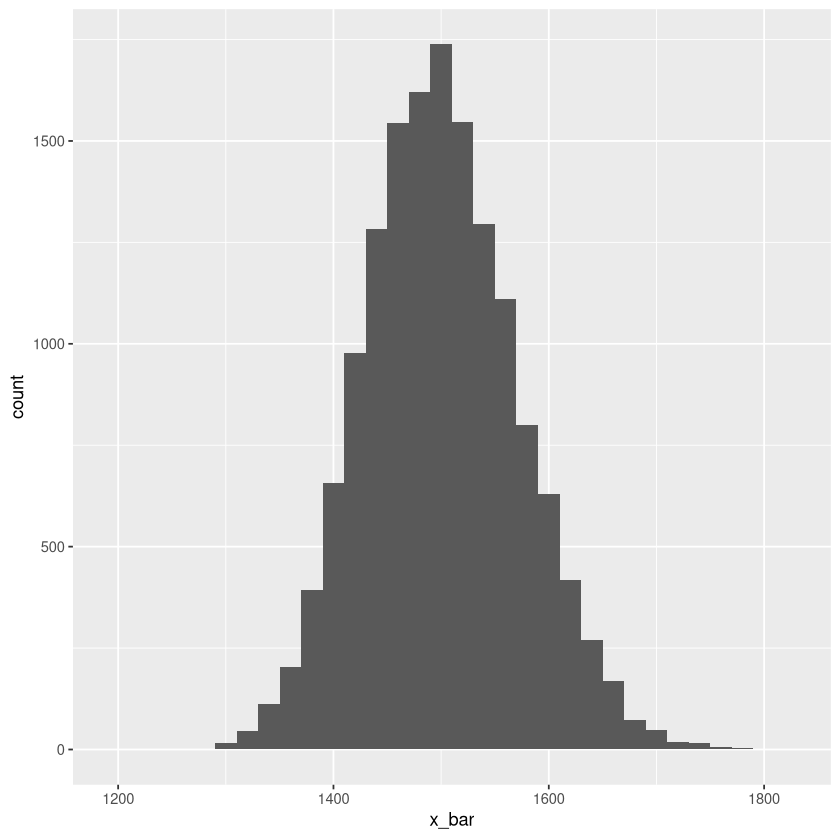

In [16]:
ggplot(data = sample_means50, aes(x = x_bar)) +
  geom_histogram(binwidth = 20)


The sampling distribution that we computed tells us much about estimating 
the average living area in homes in Ames.  Because the sample mean is an 
unbiased estimator, the sampling distribution is centered at the true average 
living area of the population, and the spread of the distribution 
indicates how much variability is induced by sampling only 50 home sales.

In the remainder of this section we will work on getting a sense of the effect that 
sample size has on our sampling distribution.

* * *
### Exercise
**Exercise**: Use the app below to create sampling distributions of means of `area`s from samples of size 10, 50, and 100. Use 5,000 simulations. What does each observation in the sampling distribution represent? How does the mean, standard error, and shape of the sampling distribution change as the sample size increases? How (if at all) do these values change if you increase the number of simulations?
</div>
    


In [17]:
shinyApp(
  ui <- fluidPage(
    
    # Sidebar with a slider input for number of bins 
    sidebarLayout(
      sidebarPanel(
        
        selectInput("selected_var",
                    "Variable:",
                    choices = list("area", "price"),
                    selected = "area"),         
        
        numericInput("n_samp",
                     "Sample size:",
                     min = 1,
                     max = nrow(ames),
                     value = 30),
        
        numericInput("n_sim",
                     "Number of samples:",
                     min = 1,
                     max = 30000,
                     value = 15000) 
        
      ),
      
      # Show a plot of the generated distribution
      mainPanel(
        plotOutput("sampling_plot"),
        verbatimTextOutput("sampling_mean"),
        verbatimTextOutput("sampling_se")
      )
    )
  ),
  
  # Define server logic required to draw a histogram
  server <- function(input, output) {
    
    # create sampling distribution
    sampling_dist <- reactive({
      ames[[input$selected_var]] %>%
        sample(size = input$n_samp * input$n_sim, replace = TRUE) %>%
        matrix(ncol = input$n_samp) %>%
        rowMeans() %>%
        data.frame(x_bar = .)
      #ames %>%
      #  rep_sample_n(size = input$n_samp, reps = input$n_sim, replace = TRUE) %>%
      #  summarise_(x_bar = mean(input$selected_var))
    })
    
    # plot sampling distribution
    output$sampling_plot <- renderPlot({
      x_min <- quantile(ames[[input$selected_var]], 0.1)
      x_max <- quantile(ames[[input$selected_var]], 0.9)
      
      ggplot(sampling_dist(), aes(x = x_bar)) +
        geom_histogram() +
        xlim(x_min, x_max) +
        ylim(0, input$n_sim * 0.35) +
        ggtitle(paste0("Sampling distribution of mean ", 
                       input$selected_var, " (n = ", input$n_samp, ")")) +
        xlab(paste("mean", input$selected_var)) +
        theme(plot.title = element_text(face = "bold", size = 16))
    })
    
    # mean of sampling distribution
    output$sampling_mean <- renderText({
      paste0("mean of sampling distribution = ", round(mean(sampling_dist()$x_bar), 2))
    })
    
    # mean of sampling distribution
    output$sampling_se <- renderText({
      paste0("SE of sampling distribution = ", round(sd(sampling_dist()$x_bar), 2))
    })
  },
  
  options = list(height = 500) 
)



Listening on http://127.0.0.1:4724

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


5. It makes intuitive sense that as the sample size increases, the center of the sampling distribution becomes a more reliable estimate for the true population mean. Also as the sample size increases, the variability of the sampling distribution ________. 
<ol>
<li> decreases </li>
<li> increases </li>
<li> stays the same </li>
</ol>

**Answer**: A. Decreases

* * *
### Exercise
**Exercise**: Take a random sample of size 50 from `price`. Using this sample, what is your best point estimate of the population mean?
</div>


In [18]:
# type your code for this Exercise here, and Run Document
samp1 %>%
    summarise(x_bar = mean(price))


x_bar
<dbl>
199856


### Exercise
**Exercise**: Since you have access to the population, simulate the sampling distribution for $\bar{x}_{price}$ by taking 5000 samples from the population of size 50 and computing 5000 sample means.  Store these means in a vector called `sample_means50`. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be?
</div>


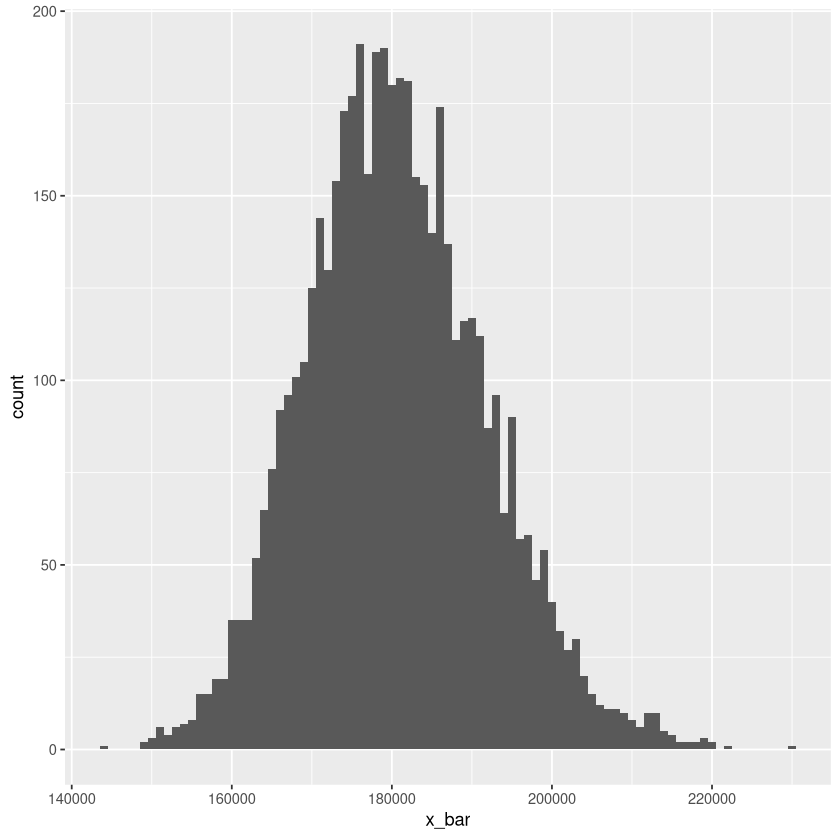

In [19]:
# type your code for this Exercise here, and Run Document
sample_means50 <- ames %>%
    rep_sample_n(size = 50, reps = 5000, replace = TRUE) %>%
    summarise(x_bar = mean(price))

ggplot(data=sample_means50, aes(x = x_bar)) +
  geom_histogram(binwidth = 1000)

The distribution is a normal function with no large outliers. Based on the distribution plotted before, an educated guess for the price population mean is around $180k.

### Exercise
**Exercise**: Change your sample size from 50 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called `sample_means150`. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 50.  Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?
</div>


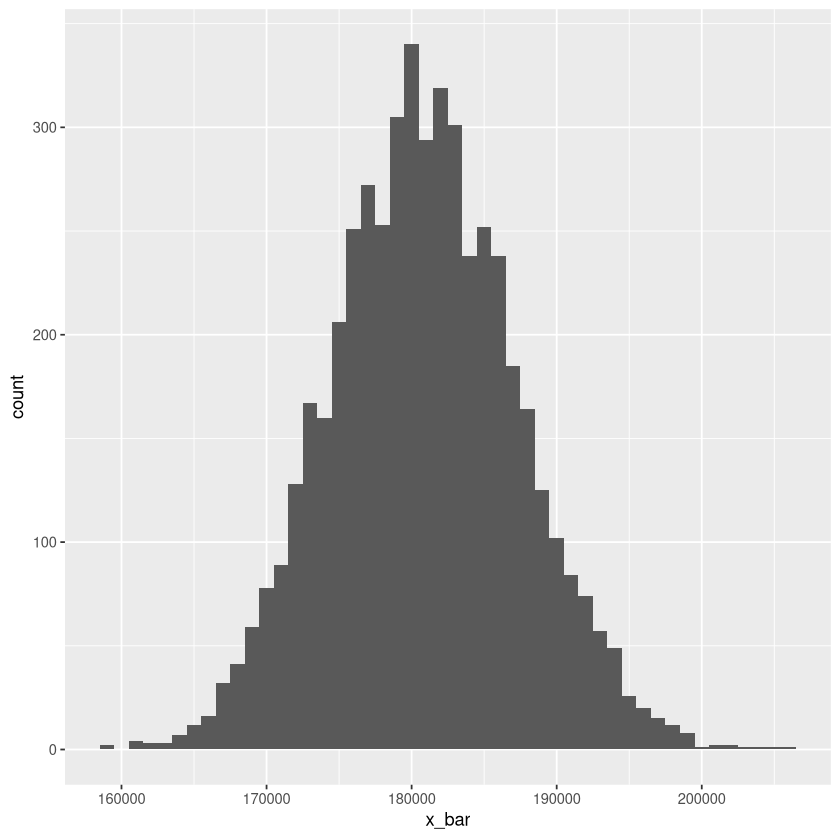

In [20]:
# type your code for this Exercise here, and Run Document
sample_means150 <- ames %>%
    rep_sample_n(size = 150, reps = 5000, replace = TRUE) %>%
    summarise(x_bar = mean(price))

ggplot(data=sample_means150, aes(x = x_bar)) +
  geom_histogram(binwidth = 1000)

Distribution has the same shape as the one plotted before. In this last plot it's clear that the value spread is lower. With a higher sample size we're more confident of the population's mean value; which is actually located at $180k

* * *

So far, we have only focused on estimating the mean living area in homes in 
Ames. Now you'll try to estimate the mean home price.

Note that while you might be able to answer some of these questions using the app
you are expected to write the required code and produce the necessary plots and
summary statistics. You are welcomed to use the app for exploration.

### Exercise
**Exercise**: Take a sample of size 15 from the population and calculate the mean `price` of the homes in this sample. Using this sample, what is your best point estimate of the population mean of prices of homes?


In [21]:
# type your code for this Exercise here, and Run Document
ames %>%
    sample_n(size = 15) %>%
    summarise(mean=mean(price))

mean
<dbl>
187895.3


**Exercise**: Since you have access to the population, simulate the sampling distribution for $\bar{x}_{price}$ by taking 2000 samples from the population of size 15 and computing 2000 sample means. Store these means in a vector called `sample_means15`. Plot the data, then describe the shape of this sampling distribution. Based on this sampling distribution, what would you guess the mean home price of the population to be? Finally, calculate and report the population mean.


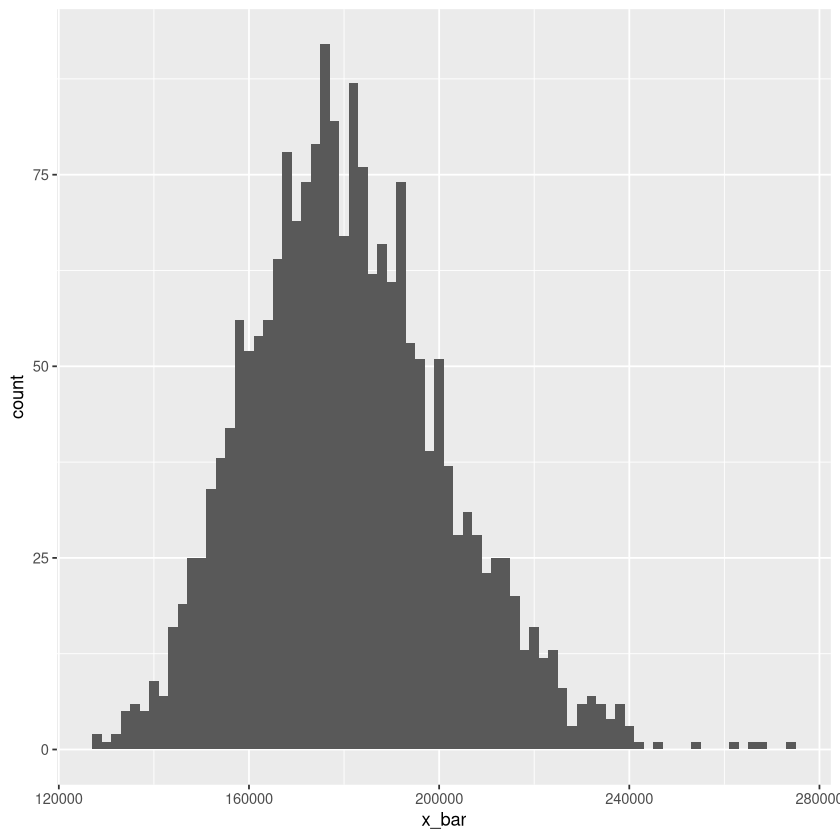

In [22]:
# type your code for this Exercise here, and Run Document
sample_means15 <- ames %>%
    rep_sample_n(size = 15, reps = 2000, replace = TRUE) %>%
    summarise(x_bar = mean(price))

ggplot(data=sample_means15, aes(x = x_bar)) +
  geom_histogram(binwidth = 2000)

Based on the bar plot from the figure above, the mean is around $180k, however it's hard to guess due to the high spread of values, this is, the standard deviation is high.

**Exercise**: Change your sample size from 15 to 150, then compute the sampling distribution using the same method as above, and store these means in a new vector called `sample_means150`. Describe the shape of this sampling distribution, and compare it to the sampling distribution for a sample size of 15. Based on this sampling distribution, what would you guess to be the mean sale price of homes in Ames?


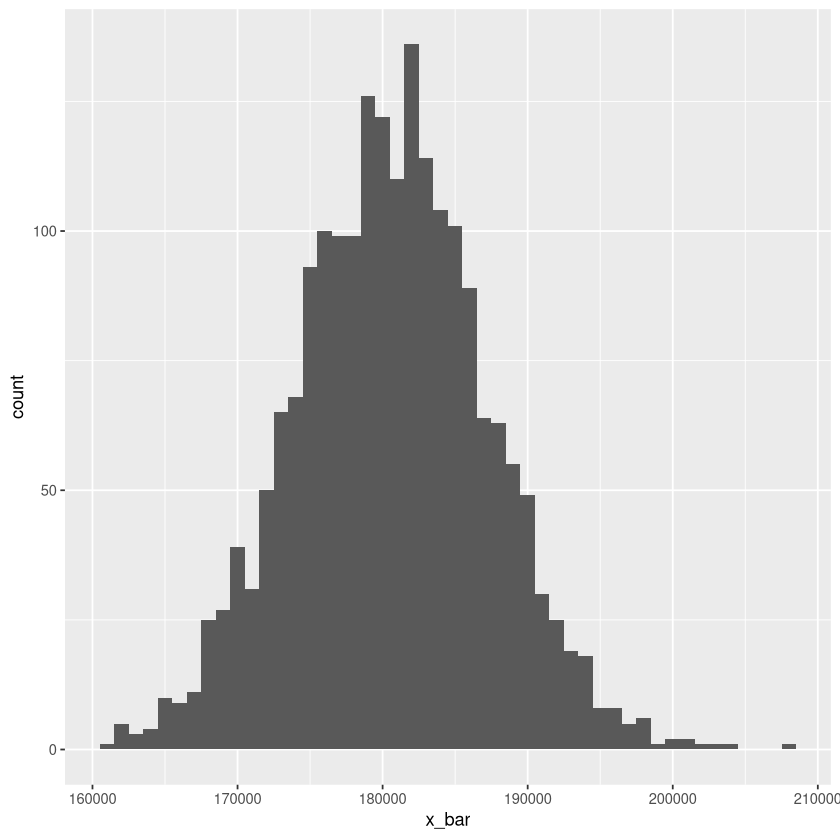

In [23]:
# type your code for this Exercise here, and Run Document
sample_means150 <- ames %>%
    rep_sample_n(size = 150, reps = 2000, replace = TRUE) %>%
    summarise(x_bar = mean(price))

ggplot(data=sample_means150, aes(x = x_bar)) +
  geom_histogram(binwidth = 1000)


Breath of values is lower, mean is clearly located around $180k with less variance.

6. Which of the following is false? 
<ol>
<li> The variability of the sampling distribution with the smaller sample size (`sample_means50`) is smaller than the variability of the sampling distribution with the larger sample size (`sample_means150`). </li>
<li> The means for the two sampling distribtuions are roughly similar. </li> 
<li> Both sampling distributions are symmetric. </li>
</ol>


**Answer**: A is false, variability gets reduced as long as the sample size increases.


This is a derivative of an [OpenIntro](https://www.openintro.org/stat/labs.php) lab, and is released under a [Attribution-NonCommercial-ShareAlike 3.0 United States](https://creativecommons.org/licenses/by-nc-sa/3.0/us/) license.
